In [2]:
import seaborn as sns
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [143]:
dset = pd.read_csv('diffp2-perc.csv', sep=';',header=None, names=['dataset', 'niter', 'epsilon', 'accuracy'])

In [144]:
baseline = pd.read_csv('standard.csv', sep=';',header=None, names=['dataset', 'niter', 'loss', 'accuracy'])

In [145]:
set(baseline.loss)

{'hinge', 'log', 'perceptron'}

In [146]:
jnd = pd.merge(dset, baseline[baseline.loss == 'perceptron'], on=['dataset', 'niter'])
jnd['relative accuracy'] = jnd.accuracy_x/ jnd.accuracy_y
jnd['privacy level'] = 1/(jnd.niter*jnd.epsilon)
#jnd

[(0.01, 500)]

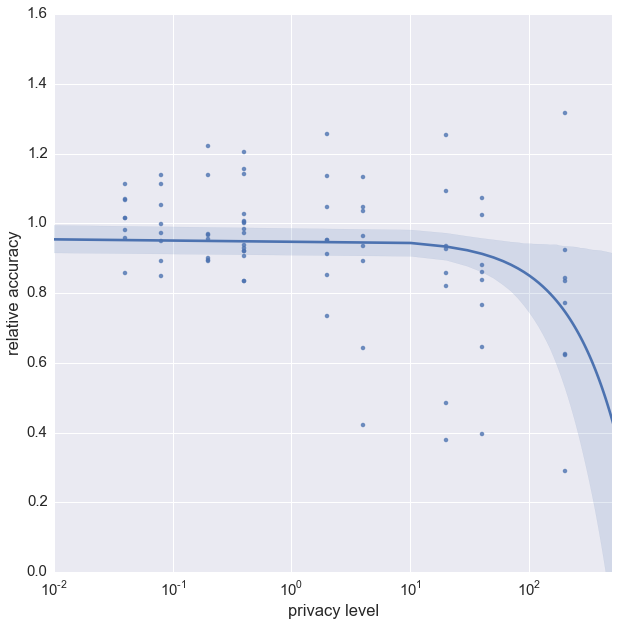

In [147]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_context("poster")
sns.set(font_scale=1.5)
ax.set(xscale="log")
g = sns.regplot(x='privacy level', y='relative accuracy',ax=ax, data=jnd)
g.set(ylim=(0, 1.6))
g.set(xlim=(10**-2, 500))

In [113]:
noisy = pd.read_csv('more_noise.csv', sep=';',header=None, names=['dataset', 'noise', 'niter', 'loss', 'accuracy'])

In [114]:
#noisy

In [131]:
jnd = pd.merge(noisy[noisy.noise <=7], baseline[baseline.loss=='hinge'], on=['dataset', 'niter', 'loss']) 
jnd['relative accuracy'] = jnd.accuracy_x  / jnd.accuracy_y

[(0.01, 10)]

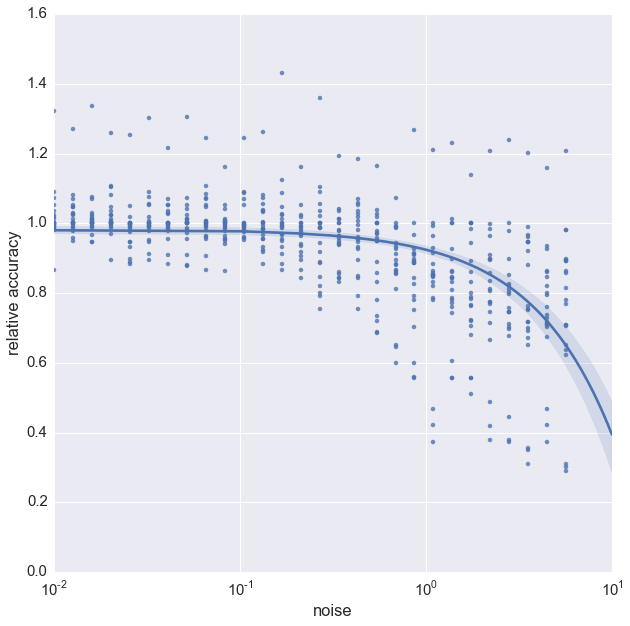

In [132]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_context("poster")
sns.set(font_scale=1.5)
ax.set(xscale="log")
g = sns.regplot(x='noise', y='relative accuracy',ax=ax, data=jnd)
g.set(ylim=(0, None))
g.set(xlim=(10**-2, 10**1))